In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
avocado_mean = pd.read_csv("avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [ ]:
#Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). 
#Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [ ]:
round(avocado_mean.rolling(3).mean().max(),2)

<AxesSubplot:xlabel='Date'>

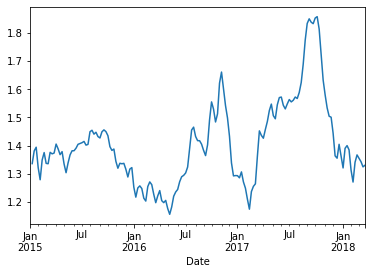

In [3]:
avocado_mean.rolling(2).mean().plot()

In [14]:
#экспоненциальное скользяя среднее
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [4]:
avocado_full =  pd.read_csv('avocado_full.csv',index_col=0, parse_dates=['Date']) #колонка в индекс

In [5]:
avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


<AxesSubplot:xlabel='Date'>

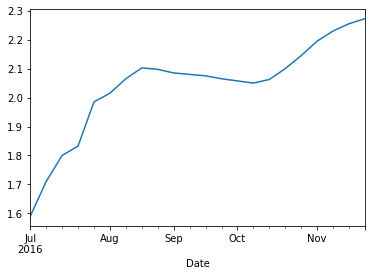

In [24]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].rolling(4).mean().loc['2016-07-01':'2016-12-01'].plot()

In [18]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].rolling(4).mean().loc['2016-08-21']

2.1025

<AxesSubplot:xlabel='Date'>

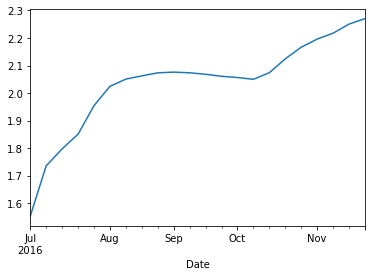

In [25]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].ewm(span=4).mean().loc['2016-07-01':'2016-12-01'].plot()

In [20]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].ewm(span=4).mean().loc['2016-08-21']

2.0624280388589287

In [21]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].ewm(span=4).mean().loc['2017-02-19']

1.5618488617826691

In [22]:
avocado_full.query("type == 'organic' and region == 'Chicago'")['AveragePrice'].rolling(4).mean().loc['2017-02-19']

1.5325000000000002

In [26]:
path_to_file = 'delays.csv'

In [97]:
df = pd.read_csv(path_to_file, sep = ',')

In [98]:
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [99]:
df['delay'] = df.delay.str.replace('-', '')

In [100]:
df['delay'] = pd.to_timedelta(df.delay)

In [101]:
data.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

In [102]:
df['delay_categorical'] = pd.cut(df.delay, 3)

In [103]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


In [104]:
df['delay_categorical'].loc[0].right > pd.to_timedelta('1 days 00:00:00')

True

In [105]:
df['delay_categorical'] = pd.cut(df.delay, 
                                  bins = [pd.to_timedelta('0 days 00:00:00'), 
                                          pd.to_timedelta('0 days 23:59:59'), 
                                          pd.to_timedelta('1 days 23:59:59'),
                                          pd.to_timedelta('2 days 23:59:59'),
                                          pd.to_timedelta('106751 days 23:47:16.854775')], 
                                  labels = ['less than 1 day' , 
                                            '1-2 days', 
                                            '2-3 days', 
                                            'more than 3 days'])

In [106]:
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


<AxesSubplot:xlabel='delay_categorical', ylabel='revenue'>

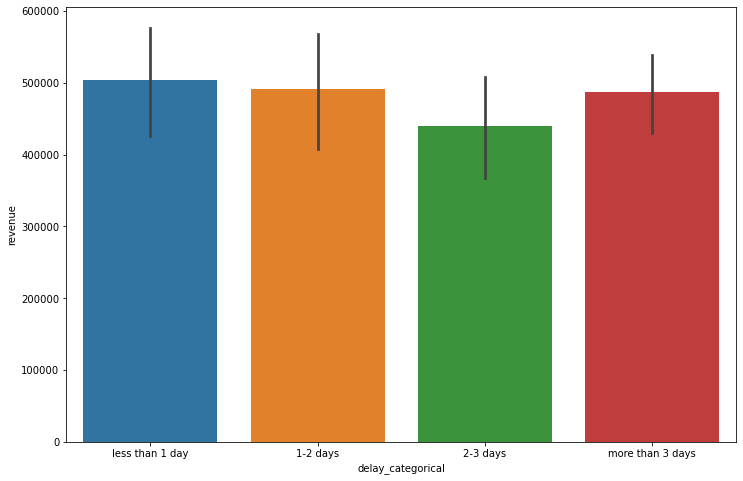

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(x = df.delay_categorical, y = df.revenue)